<a href="https://colab.research.google.com/github/maboqi/Data-Engineering-Project/blob/main/INT_Group5_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Name: INT-Group5<br>
Group Memebrs:<br>
ALIF RIDWAN - A207732<br>
MA BOQI - A191309<br>
LI MINGJIE - A191284<br>
MA HANZHENG - A178787<br>

scrapping target: https://www.jdsports.my/sale/?max=204

ETL
1. EXTRACT
USING BS CUZ ITS SYNTAX MUCH CLEANER AND UNDERSTANABLE TO USE



2.  TRANSFORM

CHECK THE DATA TYPE ACCORDINGLY TO ITS ATTRIBUTE (int, float, string, boolean),
Is there any missing data?, MAKE IT NEAT (Change Letters to Lowercase, get rid the blank space OR any irrelevant content la)


3. LOAD

just wrap it to csv la, easy task xD

In this project, we are required to perform a complete ETL for any shopping/business website (in Malay or English language)



Details on the project are given below :


(1) EXTRACT : (10 pt)

a. Pick/choose your dataset - make sure it is legal to be scrape. (1 points) DONE

b. scrape your data - identify your data attributes.  (at least 2 attribute per member) (8 points) DONE

c. AT LEAST 100  or  more record of data are collected. (1 points)
DONE


(2) TRANSFORM: (10 pt)

a. Perform any necessary data processing - ( at least 4 types of data processing and one of the processing is on the review/feedback data) (8 points)

b. Perform at least 2 or more data visualisation ( e.g before and after data cleaning) (2 points)



(3)LOAD: (2 pt)

Save your clean data into any type of file ( e.g .csv ) that can be read by pandas.



(4) REPORT (8 pt ):

a. Write your experience in ‘medium’ (medium.com) and put your shared/published (codes shared as github) in the medium as well. (you will lose 8 point if report written not in medium.com)

b. SUBMIT your medium link to ukmfolio and your cleaned .csv file. Only the appointed GROUP LEADER will submit the project.

c. WARNING: late submission will have 50%  point cut off and link unable to view will be given '0'.




According to the snippet given, the attributes that we are able to retrieve are 8, the rest is not showed because dynamic content(Review,Badge):

the 8 attributes are(item.container):


*   item title (name of the products)
*   item price (before disc)
*   item price (after disc)
*   sav (how much discount)
*   product image (exclusive only at jdsports)
*   link
*   idproduct
*   save (how much do we save in RM)




# 1. EXTRACT (SCRAPPING)

In [ ]:
#LIBRARY

!pip install requests beautifulsoup4
import pandas as pd
import re
pd.set_option('display.max_rows', None)
import numpy as np
import requests
from bs4 import BeautifulSoup

In [ ]:
#Target

url = "https://www.jdsports.my/sale/?max=204"
response = requests.get(url)

# Parse the page content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')



In [ ]:
print(soup.find('ul', class_='listProducts').prettify())

<ul class="listProducts productList imageLazy" data-breakinfinitescroll="" data-infinitescroll="" id="productListMain">
 <li class="productListItem">
  <span class="itemContainer" data-productsku="19660245_jdsportsmy">
   <a class="itemImage" data-e2e="plp-productList-link" href="/product/black-jordan-max-aura-6/19660245_jdsportsmy/">
    <picture>
     <source data-srcset="https://i8.amplience.net/t/jpl/jdmy_product_list?plu=jd_FQ8298-010_a&amp;qlt=85&amp;qlt=92&amp;w=363&amp;h=363&amp;v=1&amp;fmt=auto 1x, https://i8.amplience.net/t/jpl/jdmy_product_list?plu=jd_FQ8298-010_a&amp;qlt=85&amp;qlt=92&amp;w=726&amp;h=726&amp;v=1&amp;fmt=auto 2x" type="image/webp"/>
     <img alt="Jordan Max Aura 6" class="thumbnail img-placeholder" data-e2e="product-listing-img" data-fallbacksrc="/skins/jdgroup-desktop/public/img/products/noimage.png" data-fallbacksrcset="/skins/jdgroup-desktop/public/img/products/noimage.png 1x, /skins/jdgroup-desktop/public/img/products/noimage-lrg.png 2x" src="https://i8

In [ ]:
contents_item = soup.find('ul', class_='listProducts')
contents = contents_item.find_all(class_='itemContainer')
name = []
priceafter = []
pricebefore = []
disc = []
exclusive = []
star = []
idproduct= []
link=[]
discount=[]
for content in contents:

    names = content.find('span', class_='itemTitle')
    priceafters = content.find('span', class_='now')
    pricebefores = content.find('span', class_='was')
    discs = content.find('span', class_='sav')
    exclusives = content.find('img', {'data-e2e': 'product-listing-img'})
    idproducts = content.get('data-productsku')
    links = content.find('a', class_='itemImage')

    name.append(names.text.strip() if names else None)
    priceafter.append(priceafters.text.strip() if priceafters else None)
    pricebefore.append(pricebefores.text.strip() if pricebefores else None)
    disc.append(discs.text.strip() if discs else None)
    exclusive.append(exclusives.get('data-src') if exclusives else None)
    idproduct.append(idproducts if idproducts else None)
    link.append(links.get('href') if links else None)


In [ ]:

df = pd.DataFrame({

    'Product Name': name,
    'Price Before': pricebefore,
    'Price After': priceafter,
    'Discount': disc,#need to be formulate ( (price was-now)/price was x 100) if else then none
    'Save': disc,
    'idproduct': idproduct,
    'link': link,#need to add the www.jdsports.my infront
    'Only at JDSports': exclusive, #need to be restated (if link contain exclusive change to YES, the rest is NO)


})


df



,Product Name,Price Before,Price After,Discount,Save,idproduct,link,Only at JDSports
0,Jordan Max Aura 6,Was MYR 609.00,Now MYR 490.00,Save 20%,Save 20%,19660245_jdsportsmy,/product/black-jordan-max-aura-6/19660245_jdsp...,None
1,Converse Chuck Taylor All Star 70's Low,Was MYR 369.00,Now MYR 260.00,Save 30%,Save 30%,067651_jdsportsmy,/product/black-converse-chuck-taylor-all-star-...,None
2,Jordan Max Aura 6,Was MYR 609.00,Now MYR 430.00,Save 29%,Save 29%,19659229_jdsportsmy,/product/white-jordan-max-aura-6/19659229_jdsp...,None
3,HOKA Bondi 8,Was MYR 819.00,Now MYR 580.00,Save 29%,Save 29%,19613884_jdsportsmy,/product/white-hoka-bondi-8/19613884_jdsportsmy/,None
4,"Jordan Air 3 Retro ""Cement Grey""",Was MYR 939.00,Now MYR 760.00,Save 19%,Save 19%,19655908_jdsportsmy,/product/white-jordan-air-3-retro-cement-grey/...,https://i8.amplience.net/t/jpl/jdmy_product_li...
5,adidas Originals Samba OG,Was MYR 569.00,Now MYR 400.00,Save 30%,Save 30%,19615076_jdsportsmy,/product/white-adidas-originals-samba-og/19615...,https://i8.amplience.net/t/jpl/jdmy_product_li...
6,adidas Originals Gazelle Indoor,Was MYR 569.00,Now MYR 400.00,Save 30%,Save 30%,19647527_jdsportsmy,/product/grey-adidas-originals-gazelle-indoor/...,https://i8.amplience.net/t/jpl/jdmy_product_li...
7,Nike Air Zoom Spiridon Cage 2,Was MYR 759.00,Now MYR 460.00,Save 39%,Save 39%,15988911_jdsportsmy,/product/red-nike-air-zoom-spiridon-cage-2/159...,https://i8.amplience.net/t/jpl/jdmy_product_li...
8,adidas Originals Sambae Women's,Was MYR 569.00,Now MYR 350.00,Save 38%,Save 38%,19628773_jdsportsmy,/product/white-adidas-originals-sambae-womens/...,https://i8.amplience.net/t/jpl/jdmy_product_li...
9,adidas Originals Sambae Women's,Was MYR 569.00,Now MYR 350.00,Save 38%,Save 38%,19611884_jdsportsmy,/product/black-adidas-originals-sambae-womens/...,https://i8.amplience.net/t/jpl/jdmy_product_li...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product Name      204 non-null    object
 1   Price Before      204 non-null    object
 2   Price After       204 non-null    object
 3   Discount          204 non-null    object
 4   Save              204 non-null    object
 5   idproduct         204 non-null    object
 6   link              204 non-null    object
 7   Only at JDSports  200 non-null    object
dtypes: object(8)
memory usage: 12.9+ KB


We need to change the datatype accordingly to its attribute




# 2. TRANSFORM (SCRAPPING)

First step is done, the data looks messy isnt it? we dont want the data scientist drive crazy just because we give the not clean data.. we need to make it NEAT!

*   Cleaning Task1: Make it yes or no at JDSPORTS ONLY (Handle missing values and unwanted values)
*   Cleaning Task2: Ensure that the price contains number only, for prices before and after the discount(String type to float type)
*   Cleaning Task3: Ensure that the Save contains number only(String type to Int type)
*   Cleaning Task4: Generalized the lowercase or uppercase on name attributes
*   Cleaning Task5: Change the datatype accordingly to each attribute
*   Cleaning Task6: Eliminate any duplicates











In [ ]:
df_revised = df.copy()

#DATA PROCESSING

df_revised['Product Name'] = [name.title() for name in df_revised.get('Product Name', [])]  #Capitalized each words to make it general
df_revised['Price Before'] = [float(re.search(r'\d+(\.\d+)?', p.replace(',', '')).group()) for p in df_revised['Price Before']]#catch the nominal only and change datatype to float
df_revised['Price After'] = [float(re.search(r'\d+(\.\d+)?', p.replace(',', '')).group()) for p in df_revised['Price After']]  #catch the nominal only and change datatype to float
df_revised['Discount'] = [int(re.search(r'\d+(\.\d+)?', str(p)).group()) for p in df_revised['Save']] #catch the nominal only and change datatype to int
df_revised['Only at JDSports'] = np.where(df_revised['Only at JDSports'].str.contains('exclusive', case=False, na=False), 'Yes', 'No') #to state the products whether are only avail at jpsports online or no
df_revised["idproduct"] = df_revised["idproduct"].replace({'_jdsportsmy':''}, regex=True) #remove unwanted strings, leaving the id product only
df_revised["link"] = 'jdsports.my' + df_revised["link"] #adding jdposrts.my url infront to find the target product easier
df_revised["Save"] = df_revised["Price Before"] - df_revised["Price After"] #calculate how much ringgit do you save from discount


df_revised.rename(columns={
    'Price Before': 'Price Before(MYR)',
    'Price After': 'Price After(MYR)',
    'Save':'Save(MYR)',
    'Discount':'Discount(%)'

}, inplace=True)

df_revised.drop_duplicates(subset='Product Name',keep='first',inplace=True) #get out you unwanted duplicate!!! xD
df_revised.reset_index(drop=True, inplace=True)


df_revised.head(20)

,Product Name,Price Before(MYR),Price After(MYR),Discount(%),Save(MYR),idproduct,link,Only at JDSports
0,Jordan Max Aura 6,609.0,490.0,20,119.0,19660245,jdsports.my/product/black-jordan-max-aura-6/19...,No
1,Converse Chuck Taylor All Star 70'S Low,369.0,260.0,30,109.0,067651,jdsports.my/product/black-converse-chuck-taylo...,No
2,Hoka Bondi 8,819.0,580.0,29,239.0,19613884,jdsports.my/product/white-hoka-bondi-8/1961388...,No
3,"Jordan Air 3 Retro ""Cement Grey""",939.0,760.0,19,179.0,19655908,jdsports.my/product/white-jordan-air-3-retro-c...,No
4,Adidas Originals Samba Og,569.0,400.0,30,169.0,19615076,jdsports.my/product/white-adidas-originals-sam...,No
5,Adidas Originals Gazelle Indoor,569.0,400.0,30,169.0,19647527,jdsports.my/product/grey-adidas-originals-gaze...,Yes
6,Nike Air Zoom Spiridon Cage 2,759.0,460.0,39,299.0,15988911,jdsports.my/product/red-nike-air-zoom-spiridon...,No
7,Adidas Originals Sambae Women'S,569.0,350.0,38,219.0,19628773,jdsports.my/product/white-adidas-originals-sam...,No
8,Nike V2K Run Women'S,449.0,360.0,20,89.0,19644419,jdsports.my/product/black-nike-v2k-run-womens/...,No
9,Nike Air Force 1 '07 Next Nature,439.0,350.0,20,89.0,19660242,jdsports.my/product/white-nike-air-force-1-07-...,No


In [ ]:
df_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product Name       164 non-null    object 
 1   Price Before(MYR)  164 non-null    float64
 2   Price After(MYR)   164 non-null    float64
 3   Discount(%)        164 non-null    int64  
 4   Save(MYR)          164 non-null    float64
 5   idproduct          164 non-null    object 
 6   link               164 non-null    object 
 7   Only at JDSports   164 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 10.4+ KB


# 3. DATA VISUALIZATION

<font color = "yellow">In this project, there's not much original data we can show before the cleaning, so we choose several attributes to display the visualization and compare the output before and after cleaning.

In [ ]:
import matplotlib.pyplot as plt

<font size = 5>**Cleaning Task 1:** Make it yes or no at JDSPORTS ONLY (Handle missing values and unwanted values)

<font size = 5>Before Cleaning:

The output only reflects whether the image source existed:<br>
If the image source existed, then display the link to the image source and record it as "Got Image Link" in the Histogram of Only at JDSports.<br>
Else display "None" and record it as "Unknown" in the Histogram of Only at JDSports.

In [ ]:
df['Only at JDSports'].head()

,Only at JDSports
0,None
1,None
2,None
3,None
4,https://i8.amplience.net/t/jpl/jdmy_product_li...


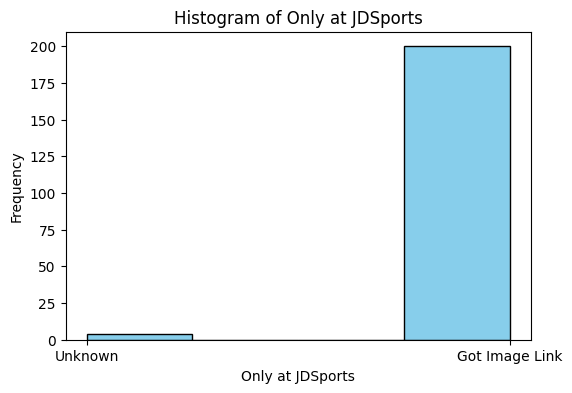

In [ ]:
# Replace None values with a string representation
df_fillNone= df['Only at JDSports'].apply(lambda x: 'Unknown' if pd.isna(x) else 'Got Image Link')

# histogram
plt.figure(figsize=(6, 4))
plt.hist(df_fillNone, bins=4, color='skyblue', edgecolor='black')
plt.title('Histogram of Only at JDSports')
plt.xlabel('Only at JDSports')
plt.ylabel('Frequency')
plt.show()

<font size = 5>After Cleaning:

The output reflect whether the product is a JDSports exclusive:<br>
If the product is a JDSports exclusive, then display "Yes" and record it as "Yes" in the Histogram of Only at JDSports.<br>
Else display "No" and record it as "No" in the Histogram of Only at JDSports

In [ ]:
df_revised['Only at JDSports'].head()

,Only at JDSports
0,No
1,No
2,No
3,No
4,No


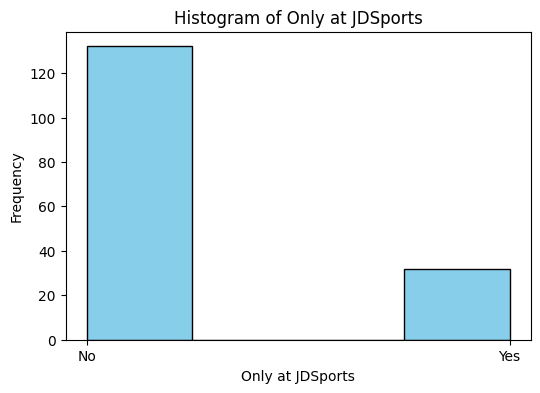

In [ ]:
# histogram
plt.figure(figsize=(6, 4))
plt.hist(df_revised['Only at JDSports'], bins=4, color='skyblue', edgecolor='black')
plt.title('Histogram of Only at JDSports')
plt.xlabel('Only at JDSports')
plt.ylabel('Frequency')
plt.show()

<font size = 5>**Cleaning Task 2:** Ensure that the price contains number only, for prices before and after the discount(String type to float type)

<font size = 5>Before Cleaning:

The output display the contents of the scraped HTML element <span> , which include non-numeric content like "Was", "MYR". The data type is String.

In [ ]:
df[['Price Before', 'Price After']].head()

,Price Before,Price After
0,Was MYR 609.00,Now MYR 490.00
1,Was MYR 369.00,Now MYR 260.00
2,Was MYR 609.00,Now MYR 430.00
3,Was MYR 819.00,Now MYR 580.00
4,Was MYR 939.00,Now MYR 760.00


<font size = 5>After Cleaning:

The output delete the unwanted contents and only display numeric content like 609.0. The data type is float. The visualization use a Scatterplot to display the relationship between the Price Before and the Price After.

In [ ]:
df_revised[['Price Before(MYR)', 'Price After(MYR)']].head()

,Price Before(MYR),Price After(MYR)
0,609.0,490.0
1,369.0,260.0
2,819.0,580.0
3,939.0,760.0
4,569.0,400.0


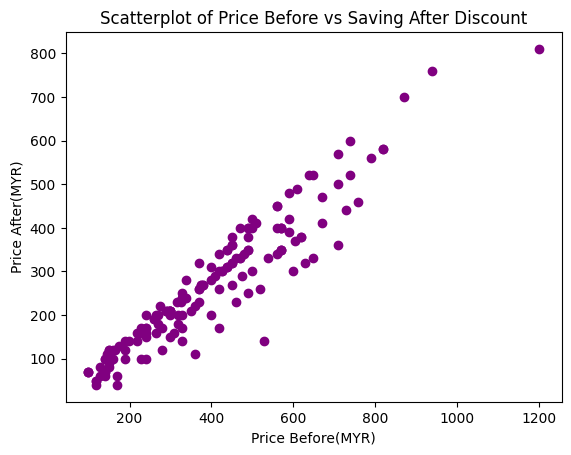

In [ ]:
df_sorted = df_revised.sort_values(by='Price After(MYR)')

plt.figure()
plt.scatter(df_sorted['Price Before(MYR)'], df_sorted['Price After(MYR)'], color='purple')
plt.title('Scatterplot of Price Before vs Saving After Discount')
plt.xlabel('Price Before(MYR)')
plt.ylabel('Price After(MYR)')



#plt.grid(True)
plt.show()


<font size = 5>**Cleaning Task 3:** Ensure that the Save contains number only(String type to Int type)

<font size = 5>Before Cleaning:

The output display the contents of the scraped HTML element <span> , which include non-numeric content like "Save", "20%". The data type is String.

In [ ]:
df['Save'].head()

,Save
0,Save 20%
1,Save 30%
2,Save 29%
3,Save 29%
4,Save 19%


<font size = 5>After Cleaning:

The output delete the unwanted contents and display saved money in MRY. The data type is float. The visualization use a Boxplot to display the distribution of data and outliers.

In [ ]:
df_revised['Save(MYR)'].head()

,Save(MYR)
0,119.0
1,109.0
2,239.0
3,179.0
4,169.0


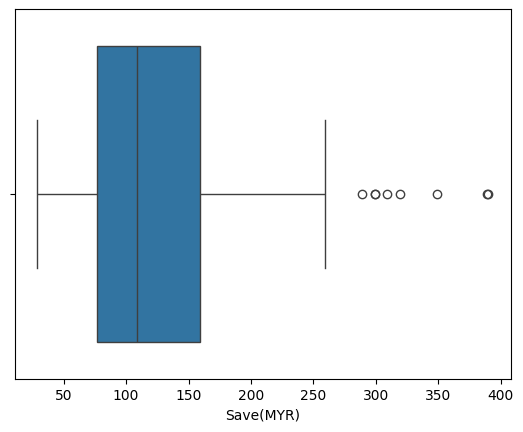

Minimum value: 29.0
Maximum value: 390.0


In [ ]:
import seaborn as sns

sns.boxplot(x=df_revised['Save(MYR)'])
plt.show()
data = df_revised['Save(MYR)']
print("Minimum value:", data.min())
print("Maximum value:", data.max())

<font size = 5>**Cleaning Task 4:** Generalized the lowercase or uppercase on name attributes

<font size = 5>Before Cleaning:

The output the List Product Names without specified lowercase or uppercase on name attributes.

In [ ]:
df['Product Name'].iloc[5:11]

,Product Name
5,adidas Originals Samba OG
6,adidas Originals Gazelle Indoor
7,Nike Air Zoom Spiridon Cage 2
8,adidas Originals Sambae Women's
9,adidas Originals Sambae Women's
10,Nike V2K Run Women's


<font size = 5>After Cleaning:

The output the List Product Names with specified lowercase or uppercase on name attributes.

In [ ]:
df_revised['Product Name'].iloc[5:11]

,Product Name
5,Adidas Originals Gazelle Indoor
6,Nike Air Zoom Spiridon Cage 2
7,Adidas Originals Sambae Women'S
8,Nike V2K Run Women'S
9,Nike Air Force 1 '07 Next Nature
10,Nike Air Force 1 ’07 Lv8 Women'S


<font size = 5>**Cleaning Task 5:** Change the datatype accordingly to each attribute

<font size = 5>Before Cleaning

The output displays the product ID with unprocessed suffix and website link has no domain name.

In [ ]:
df[['idproduct', 'link']].head()

,idproduct,link
0,19660245_jdsportsmy,/product/black-jordan-max-aura-6/19660245_jdsp...
1,067651_jdsportsmy,/product/black-converse-chuck-taylor-all-star-...
2,19659229_jdsportsmy,/product/white-jordan-max-aura-6/19659229_jdsp...
3,19613884_jdsportsmy,/product/white-hoka-bondi-8/19613884_jdsportsmy/
4,19655908_jdsportsmy,/product/white-jordan-air-3-retro-cement-grey/...


<font size = 5>After Cleaning:

The output displays the product ID number and website link with domain name.

In [ ]:
df_revised[['idproduct', 'link']].head()

,idproduct,link
0,19660245,jdsports.my/product/black-jordan-max-aura-6/19...
1,067651,jdsports.my/product/black-converse-chuck-taylo...
2,19613884,jdsports.my/product/white-hoka-bondi-8/1961388...
3,19655908,jdsports.my/product/white-jordan-air-3-retro-c...
4,19615076,jdsports.my/product/white-adidas-originals-sam...


<font size = 5>**Cleaning Task 6:** Eliminate any duplicates

<font size = 5>Before Cleaning:

The output displays the number of duplicated names, which is not 0.

In [ ]:
df.duplicated(subset=['Product Name']).sum()

40

<font size = 5>After Cleaning:

The output displays the number of duplicated names, which is 0 now, and the records of the dataframe also decrease after dropping the duplicated records.

In [ ]:
df_revised.duplicated(subset=['Product Name'])[df_revised.duplicated(subset=['Product Name']) == True].sum()

0

**There are 0 duplicate rows after the cleaning**

In [ ]:
print("Before Cleaning",df.shape)
print("After Cleaning",df_revised.shape)

Before Cleaning (204, 8)
After Cleaning (164, 8)


In [ ]:
df_revised.to_csv('df_revised.csv')